# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
import numpy as np
%matplotlib notebook

## Import the data

Separate into Record max and Record min dataframe

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head(10)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


In [4]:
df_max = df[df['Element']=='TMAX']
df_min = df[df['Element']=='TMIN']
df_min.head(10)

,ID,Date,Element,Data_Value
1,USC00208972,2009-04-29,TMIN,56
6,USC00207308,2010-06-29,TMIN,144
8,USW00004848,2007-12-14,TMIN,-16
11,USC00205822,2008-05-29,TMIN,28
12,USC00203712,2008-10-17,TMIN,17
17,USC00205450,2006-04-22,TMIN,67
19,USC00205563,2015-01-03,TMIN,-39
20,USC00201250,2011-03-28,TMIN,-78
22,USC00207320,2008-02-03,TMIN,-39
24,USC00201250,2012-03-20,TMIN,100


Sort according to date

In [5]:
df_min['Date'] = pd.to_datetime(df_min['Date'])
df_min = df_min.sort_values('Date')
df_min.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
32274,USC00208202,2005-01-01,TMIN,-50
18066,USW00014853,2005-01-01,TMIN,-39
18232,USC00205050,2005-01-01,TMIN,-17
17155,USC00207320,2005-01-01,TMIN,-11
24805,USW00094889,2005-01-01,TMIN,-56
10079,USW00014833,2005-01-01,TMIN,-44
2035,USC00202308,2005-01-01,TMIN,-17
41309,USC00208080,2005-01-01,TMIN,-39
1906,USC00205822,2005-01-01,TMIN,-17


Remove leap days

Extract date and temperature

In [6]:
df_minPeriod = df_min[['Date','Data_Value']]
df_minPeriod = df_minPeriod[df_minPeriod['Date']!='2008-02-29']
df_minPeriod = df_minPeriod[df_minPeriod['Date']!='2012-02-29']
df_minPeriod.head(10)

,Date,Data_Value
60995,2005-01-01,0
32274,2005-01-01,-50
18066,2005-01-01,-39
18232,2005-01-01,-17
17155,2005-01-01,-11
24805,2005-01-01,-56
10079,2005-01-01,-44
2035,2005-01-01,-17
41309,2005-01-01,-39
1906,2005-01-01,-17


Set index to Date

Set the index from year 2005 to year 2014

Make a column showing the day of year

In [7]:
df_minPeriod = df_minPeriod.set_index('Date')
df_minPeriod = df_minPeriod['2005':'2014']
df_minPeriod['Day of year'] = df_minPeriod.index.dayofyear
df_minPeriod.head(10)

,Data_Value,Day of year
Date,,
2005-01-01,0,1
2005-01-01,-50,1
2005-01-01,-39,1
2005-01-01,-17,1
2005-01-01,-11,1
2005-01-01,-56,1
2005-01-01,-44,1
2005-01-01,-17,1
2005-01-01,-39,1


Take the Record low of the period 2005-2014

In [8]:
df_minclean = df_minPeriod.groupby('Day of year').agg(np.min)
df_minclean = df_minclean.rename(columns={'Data_Value':'Record low'})
df_minclean.head(10)

,Record low
Day of year,
1,-160
2,-267
3,-267
4,-261
5,-150
6,-266
7,-306
8,-294
9,-278


Do the same thing for Record high

In [9]:
df_max['Date'] = pd.to_datetime(df_max['Date'])
df_max = df_max.sort_values('Date')

df_maxPeriod = df_max[['Date','Data_Value']]
df_maxPeriod = df_maxPeriod[df_maxPeriod['Date']!='2008-02-29']
df_maxPeriod = df_maxPeriod[df_maxPeriod['Date']!='2012-02-29']
df_maxPeriod = df_maxPeriod.set_index('Date')
df_maxPeriod = df_maxPeriod['2005':'2014']
df_maxPeriod['Day of year'] = df_maxPeriod.index.dayofyear
df_maxclean = df_maxPeriod.groupby('Day of year').agg(np.max)

df_maxclean = df_maxclean.rename(columns={'Data_Value':'Record high'})

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Combine the data into one dataframe

In [10]:
df_clean = pd.merge(df_minclean,df_maxclean,left_index=True,right_index=True)
df_clean.head(10)

,Record low,Record high
Day of year,,
1,-160,156
2,-267,139
3,-267,133
4,-261,106
5,-150,128
6,-266,189
7,-306,217
8,-294,194
9,-278,178


Do the same thing for year 2015

In [11]:
df_min2015 = df_min[['Date','Data_Value']]
df_min2015 = df_min2015.set_index('Date')
df_min2015 = df_min2015['2015']
df_min2015['Day of year'] = df_min2015.index.dayofyear
df_min2015clean = df_min2015.groupby('Day of year').agg(np.min)

df_min2015clean = df_min2015clean.rename(columns={'Data_Value':'Record low 2015'})

df_max2015 = df_max[['Date','Data_Value']]
df_max2015 = df_max2015.set_index('Date')
df_max2015 = df_max2015['2015']
df_max2015['Day of year'] = df_max2015.index.dayofyear
df_max2015clean = df_max2015.groupby('Day of year').agg(np.max)

df_max2015clean = df_max2015clean.rename(columns={'Data_Value':'Record high 2015'})

df_2015 = pd.merge(df_min2015clean,df_max2015clean,left_index=True,right_index=True)
df_2015.head(10)

,Record low 2015,Record high 2015
Day of year,,
1,-133,11
2,-122,39
3,-67,39
4,-88,44
5,-155,28
6,-182,33
7,-182,-67
8,-211,-82
9,-206,-66


Merge all data together

In [12]:
df_master = pd.merge(df_clean,df_2015,left_index=True,right_index=True)
df_master.head(10)

,Record low,Record high,Record low 2015,Record high 2015
Day of year,,,,
1,-160,156,-133,11
2,-267,139,-122,39
3,-267,133,-67,39
4,-261,106,-88,44
5,-150,128,-155,28
6,-266,189,-182,33
7,-306,217,-182,-67
8,-294,194,-211,-82
9,-278,178,-206,-66


Extract the days which 2015 beats the period 2005-2014

In [13]:
df_2015lower = df_master.loc[:,['Record low','Record low 2015']][df_master['Record low 2015']<df_master['Record low']]
df_2015lower.head(10)

,Record low,Record low 2015
Day of year,,
5,-150,-155
11,-183,-200
34,-232,-238
45,-217,-239
46,-256,-260
47,-222,-294
48,-243,-272
50,-188,-260
51,-178,-343


In [14]:
df_2015higher = df_master.loc[:,['Record high','Record high 2015']][df_master['Record high 2015']>df_master['Record high']]
df_2015higher.head(10)

,Record high,Record high 2015
Day of year,,
40,78,83
107,272,278
127,261,306
128,317,333
131,294,306
138,289,317
208,333,339
210,339,361
250,317,350


## Graphing

Create the figure

<IPython.core.display.Javascript object>


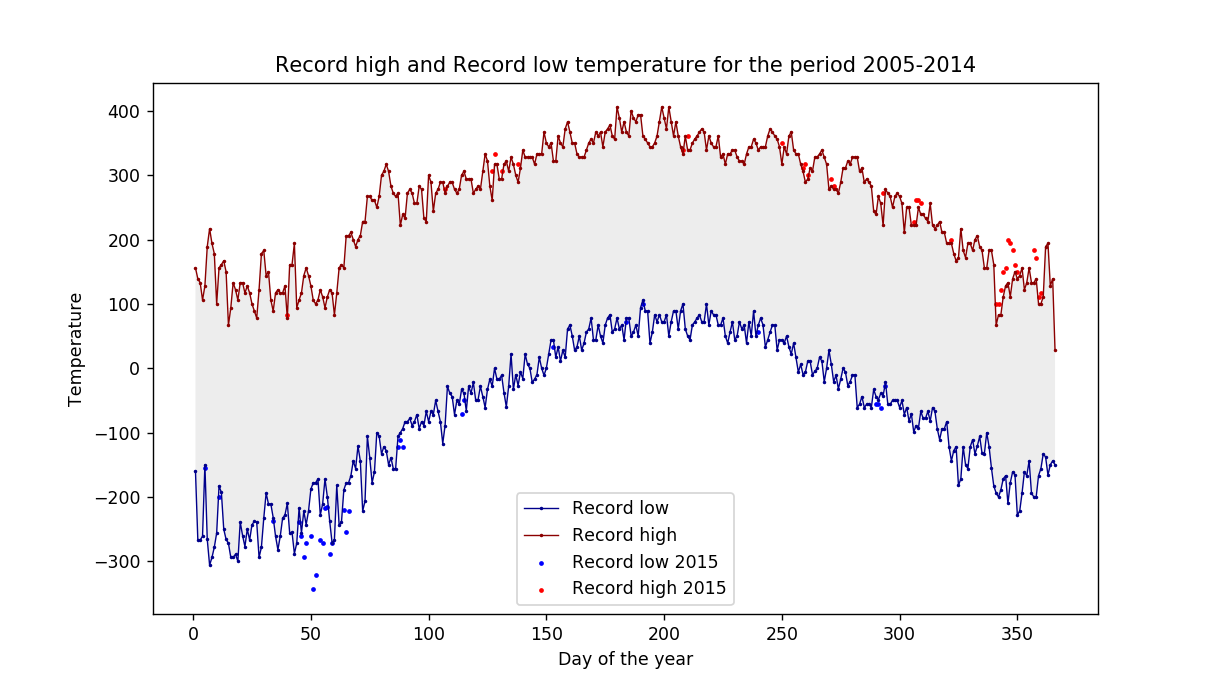

In [15]:
fig = plt.figure()

In [16]:
plt.clf()

Plot the line graph for period 2005-2014

In [17]:
plt.plot(df_clean.index,
         df_clean['Record low'],
         '-o',label='Record low',color='darkblue',markersize=1,linewidth=0.8)

In [18]:
plt.plot(df_clean.index,
         df_clean['Record high'],
         '-o',label='Record high',color='darkred',markersize=1,linewidth=0.8)

Shade the area in between record high and low

In [19]:
plt.gca().fill_between(df_clean.index,
                       df_clean['Record low'],
                       df_clean['Record high'],
                       facecolor='lightgray',alpha=0.4)

Plot scatter diagram for points 2015 beat period 2005-2014

In [20]:
plt.scatter(df_2015lower.index,
            df_2015lower['Record low 2015'],
            c='blue',s=3)

In [21]:
plt.scatter(df_2015higher.index,
            df_2015higher['Record high 2015'],
            c='red',s=3)

Label the diagram

In [22]:
plt.xlabel('Day of the year')
plt.ylabel('Temperature')
plt.title('Record high and Record low temperature for the period 2005-2014')
plt.legend()